In [1]:
import mtcnn
import cv2
import os
import PIL.Image as Image
import io
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageEnhance
import imagehash
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
mtcnn.__version__

'0.1.0'

In [3]:
from matplotlib.patches import Rectangle

In [4]:
import ipywidgets as widgets
import ipython_blocking

In [15]:
button = widgets.Button(description='Click a picture')
out = widgets.Output()

In [16]:
def on_button_clicked(_):
        cam = cv2.VideoCapture(0)

        cv2.namedWindow("test")

        while True:
            ret, frame = cam.read()
            if not ret:
                print("incorrect frame")
                break
            cv2.imshow("test", frame)
            count = 1
            k = cv2.waitKey(1)
            if k == ord('e'):
                print("closing...")
                break
            elif k == ord('t'):
                img_name = "image"+str(count)+".jpg"
                cv2.imwrite(os.path.join("D://", img_name), frame)
                print("image written")
                count += 1
        cam.release()

        cv2.destroyAllWindows()

In [17]:
button.on_click(on_button_clicked)
widgets.VBox([button,out])

image written
closing...


In [13]:
%blockrun button

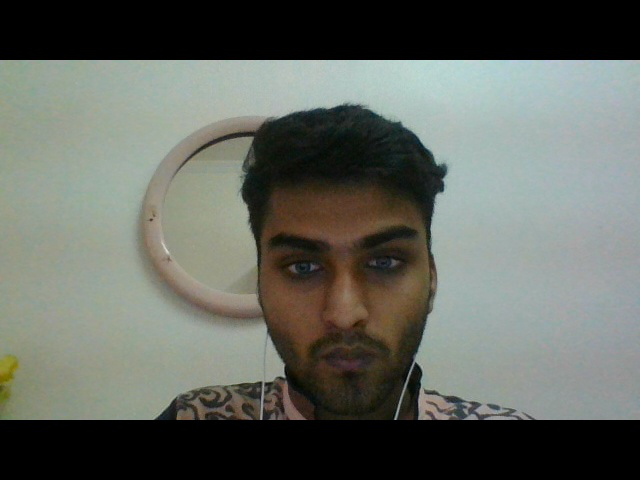

In [18]:
image_taken = Image.open("D://image1.jpg")
image_taken

In [19]:
w,h = image_taken.size
w,h

(640, 480)

In [20]:
new_size=(300,300)

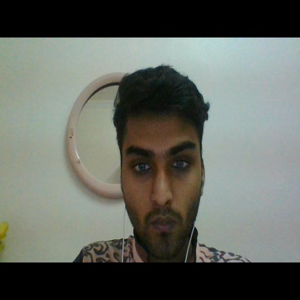

In [21]:
image_taken = image_taken.resize(new_size)
image_taken

In [22]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [ ]:
%block upload 

In [23]:
for k,v in upload.value.items():
    print(k)

jinooo.jpg


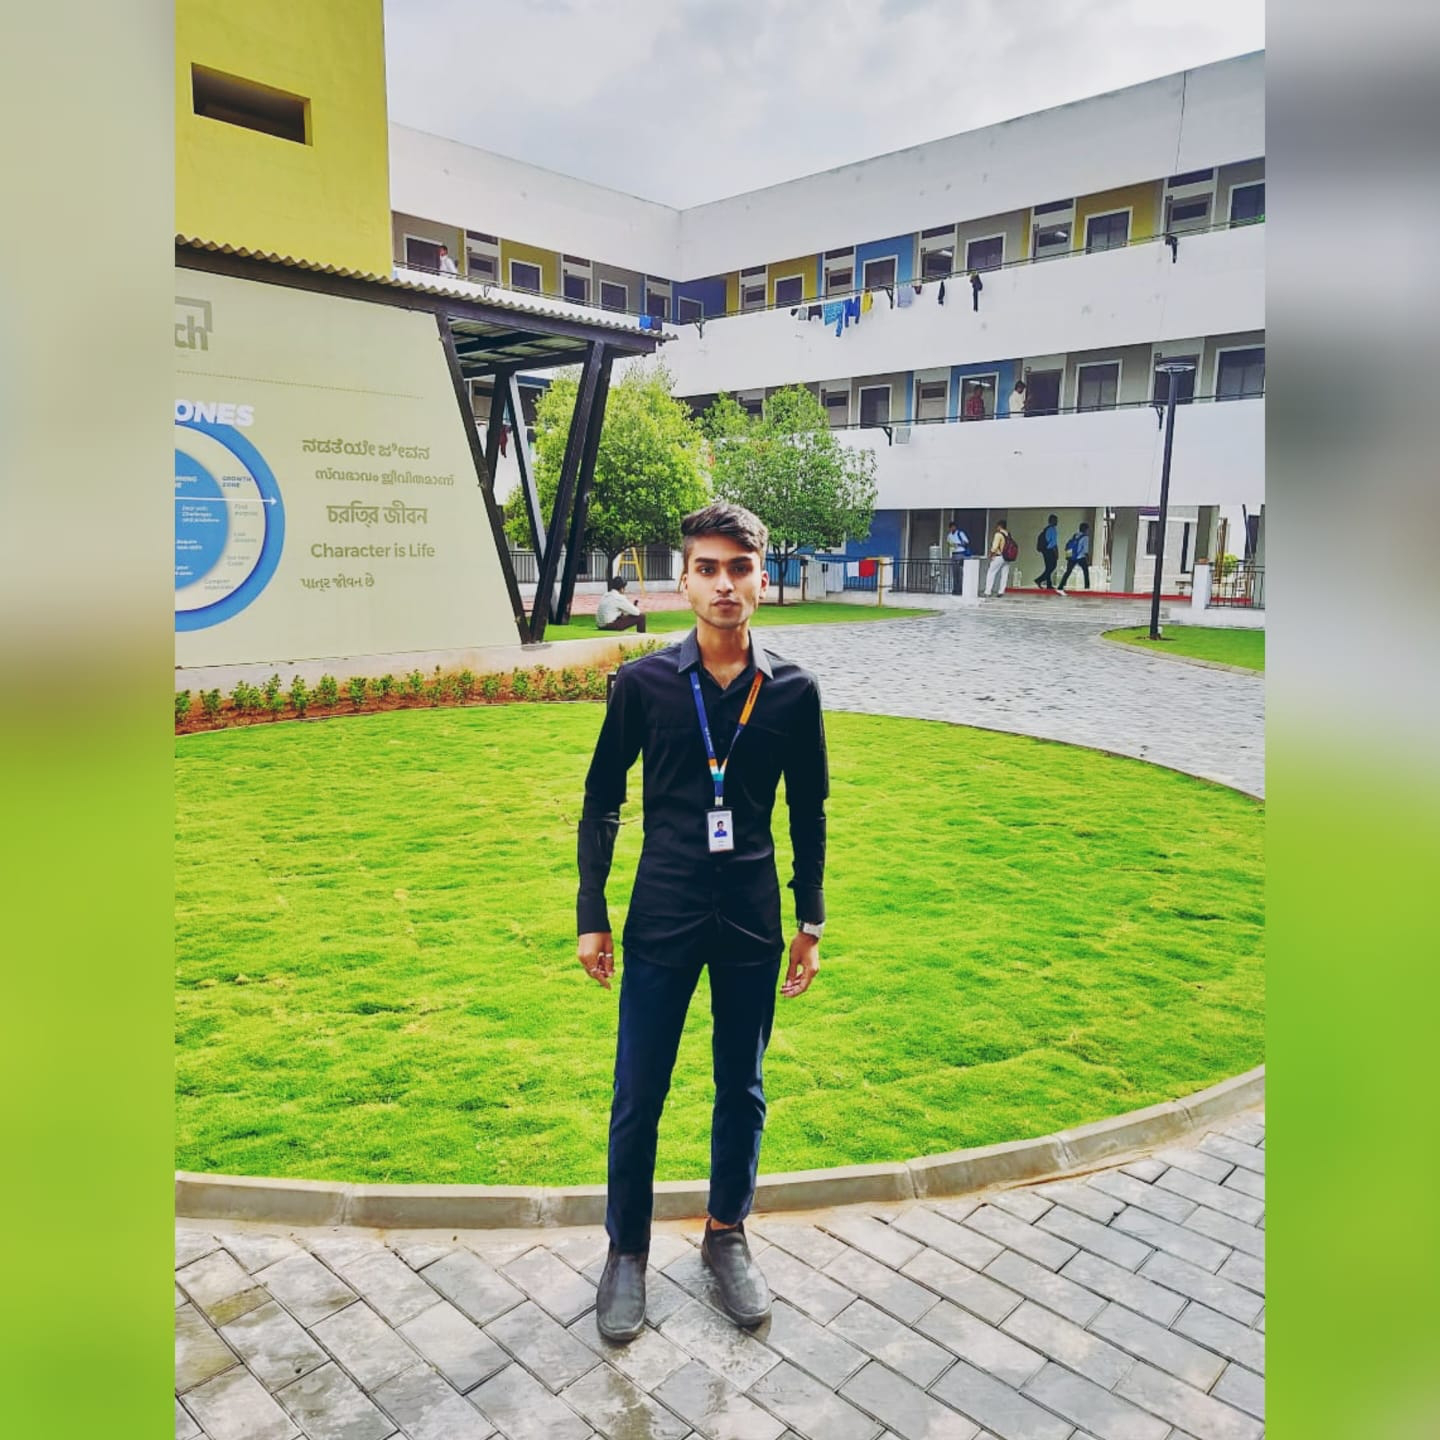

In [24]:
for name, file_info in upload.value.items():
    image_from_pc = Image.open(io.BytesIO(file_info['content']))
    
image_from_pc

In [25]:
w,h = image_from_pc.size
w,h

(1440, 1440)

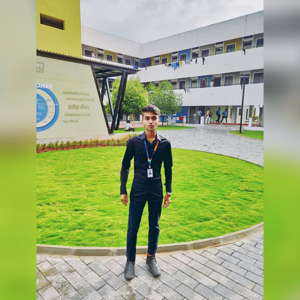

In [26]:
image_from_pc = image_from_pc.resize(new_size)
image_from_pc

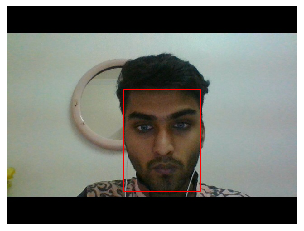

In [27]:
filename = 'D://image1.jpg'
pixels = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)

data = plt.imread(filename)
plt.imshow(data)
plt.axis('off')
ax = plt.gca()
for result in faces:
    x1, y1, width, height = result['box']
    x2, y2 = x1 + width, y1 + height
    roi = data[y1:y2, x1:x2]
    rect = Rectangle((x1, y1), width, height, fill=False, color='red')
    ax.add_patch(rect)
plt.show()

In [28]:
def image_resize(image,inter = cv2.INTER_AREA):
    resized = cv2.resize(image,(100,100), interpolation = inter)
    return resized

In [29]:
image1 =image_resize(roi)
image1.shape

(100, 100, 3)

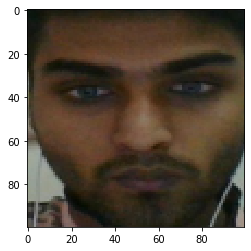

In [30]:
plt.imshow(image1)

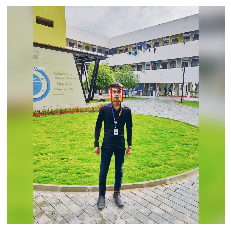

In [32]:
filename="D://DATA_SCIENCE//"+k
pixels = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)

data = plt.imread(filename)
plt.imshow(data)
plt.axis('off')
ax = plt.gca()
for result in faces:
    x1, y1, width, height = result['box']
    x2, y2 = x1 + width, y1 + height
    roi = data[y1:y2, x1:x2]
    rect = Rectangle((x1, y1), width, height, fill=False, color='red')
    ax.add_patch(rect)
plt.show()


In [33]:
image2 =image_resize(roi)
image2.shape

(100, 100, 3)

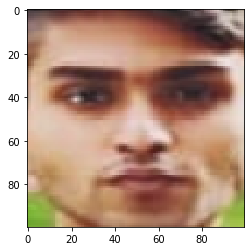

In [34]:
plt.imshow(image2)

In [35]:
button = widgets.Button(description='Click to Predict')
out = widgets.Output()

In [36]:
def checking_similarity(imageA,imageB):
    hash = imagehash.average_hash(Image.fromarray(imageA))
    otherhash = imagehash.average_hash(Image.fromarray(imageB))
    total = hash - otherhash
    plt.subplot(1,2,1)
    plt.imshow(imageA)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(imageB)
    plt.axis('off')
    if(total <=10):
        print("These images are closely related.Their hamming score is",str(total))
    elif(total>10 & total <=20):
        print("These images are somewhat related.Their hamming score is",str(total))
    else:
        print("These images have no relation.Their hamming score is",str(total))

In [37]:
def on_button_clicked(_):
    checking_similarity(image1,image2)

These images are somewhat related.Their hamming score is 16


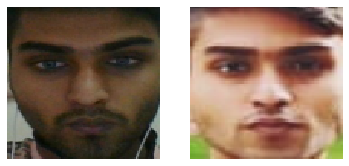

In [38]:
button.on_click(on_button_clicked)
widgets.VBox([button,out])